# Ellipsoidal nested sampling

This example demonstrates how to use ellipsoidal nested rejection sampling [1] to sample from the posterior distribution for a logistic model fitted to model-simulated data.

[1] "A nested sampling algorithm for cosmological model selection", Pia Mukherjee, David Parkinson and Andrew R. Liddle, [arXiv:astro-ph/0508461v2](https://arxiv.org/abs/astro-ph/0508461).

First create fake data.

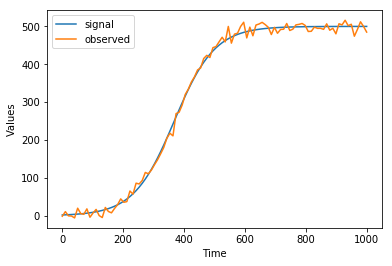

In [1]:
import pints
import pints.toy as toy
import numpy as np
import matplotlib.pyplot as plt

# Load a forward model
model = toy.LogisticModel()

# Create some toy data
r = 0.015
k = 500
real_parameters = [r, k]
times = np.linspace(0, 1000, 100)
signal_values = model.simulate(real_parameters, times)

# Add independent Gaussian noise
sigma = 10
observed_values = signal_values + pints.noise.independent(sigma, signal_values.shape)

# Plot
plt.plot(times,signal_values,label = 'signal')
plt.plot(times,observed_values,label = 'observed')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.show()

Create the nested sampler that will be used to sample from the posterior.

In [2]:
# Create an object with links to the model and time series
problem = pints.SingleOutputProblem(model, times, observed_values)

# Create a log-likelihood function (adds an extra parameter!)
log_likelihood = pints.GaussianLogLikelihood(problem)

# Create a uniform prior over both the parameters and the new noise variable
log_prior = pints.UniformLogPrior(
    [0.01, 400, sigma * 0.5],
    [0.02, 600, sigma * 1.5])

# Create a nested ellipsoidal rejectection sampler
sampler = pints.NestedController(log_likelihood, log_prior, method=pints.NestedEllipsoidSampler)

# Set number of iterations
sampler.set_iterations(8000)

# Set the number of posterior samples to generate
sampler.set_n_posterior_samples(1600)

# Do proposals in parallel
sampler.set_parallel(True)

# Use dynamic enlargement factor
sampler._sampler.set_dynamic_enlargement_factor(1)

Run the sampler!

In [3]:
samples = sampler.run()
print('Done!')

Running Nested ellipsoidal sampler
Number of active points: 400
Total number of iterations: 8000
Total number of posterior samples: 1600
Iter. Eval. Time m:s Delta_log(z) Acceptance rate
0     1       0:01.9 -inf          1             
0     2       0:01.9 -inf          1             
0     3       0:01.9 -inf          1             
0     4       0:01.9 -inf          1             
0     5       0:01.9 -inf          1             
0     21      0:02.0 -inf          1             
0     41      0:02.0 -inf          1             
0     61      0:02.0 -inf          1             
0     81      0:02.1 -inf          1             
0     101     0:02.1 -inf          1             
0     121     0:02.2 -inf          1             
0     141     0:02.2 -inf          1             
0     161     0:02.3 -inf          1             
0     181     0:02.3 -inf          1             
0     201     0:02.4 -inf          1             
0     221     0:02.4 -inf          1             
0     241    

3140  7184    0:14.4 -22.68497473  0.404038915   
3160  7220    0:14.5 -22.00901291  0.40483871    
3180  7252    0:14.8 -21.37612081  0.4058669     
3200  7284    0:14.8 -20.80887879  0.406885532   
3220  7324    0:14.8 -20.25530169  0.407423455   
3240  7360    0:14.9 -19.73618796  0.408189655   
3260  7392    0:14.9 -19.23279631  0.409181922   
3280  7428    0:15.0 -18.69041829  0.409931702   
3300  7468    0:15.0 -18.11761143  0.410441426146
3320  7516    0:15.1 -17.61364559  0.410483418   
3340  7568    0:15.1 -17.10341116  0.410295759   
3360  7632    0:15.2 -16.55232645  0.40943031    
3380  7676    0:15.2 -16.08071787  0.409703134   
3400  7720    0:15.3 -15.66040328  0.409972678   
3420  7744    0:15.3 -15.23785403  0.411356209   
3440  7768    0:15.3 -14.81803427  0.412730727   
3460  7792    0:15.4 -14.39978337  0.41409632    
3480  7820    0:15.7 -13.98855862  0.415229111   
3500  7848    0:15.7 -13.91559884  0.416353383   
3520  7872    0:15.7 -13.54425869  0.417692719   


## Plot posterior samples versus true parameter values (dashed lines)

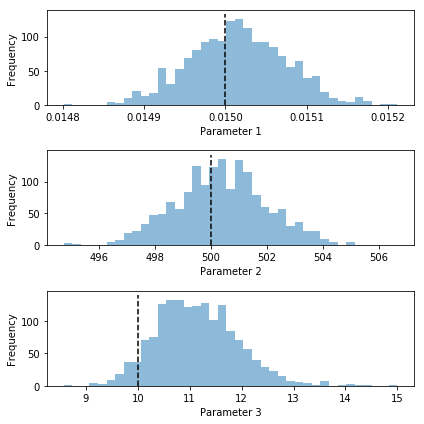

In [4]:
# Plot output
import pints.plot

pints.plot.histogram([samples], ref_parameters=[r, k, sigma])

plt.show()

## Plot posterior predictive simulations versus the observed data

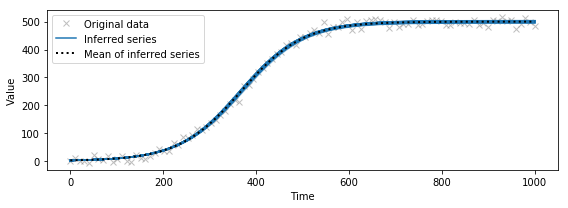

In [5]:
pints.plot.series(samples[:100], problem)
plt.show()

## Marginal likelihood estimate

In [6]:
print('marginal log-likelihood = ' + str(sampler.marginal_log_likelihood())
      + ' ± ' + str(sampler.marginal_log_likelihood_standard_deviation()))

marginal log-likelihood = -391.885476666 ± 0.0783236845709


## Effective sample size

In [7]:
print('effective sample size = ' + str(sampler.effective_sample_size()))

effective sample size = 1565.34694054
